###  - Objectives
Predict the house price given vairous features of dataset.

### - Subgoals
- Exploratory data analysis (EDA)/ Preprocessing
. Histogram  
. Normality/Skewness  
. Missing values  
. Correlations among features  
. Outliers  
- Feature Selection (for predictors)  
. correlation matrix  
. K-best  
. ANOVA test for categorical features  
- Modeling  
. regularized regressoin - LASSO, ElasticNet  
. XGBoost Regression  
- Others  
. categorical predictor by one-hot encoding  


### - References
  
    
    
      
      

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from scipy.stats import norm
%matplotlib inline

In [2]:
# import data
df = pd.read_csv('./train.csv')

## 1. EDA


** a. Histogram **
check out histogram for some features

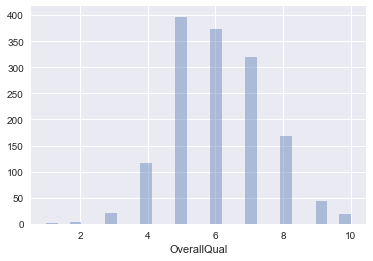

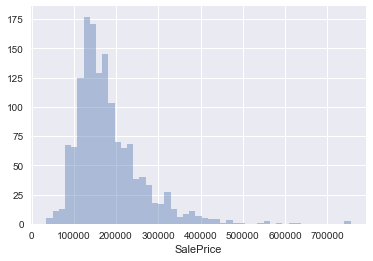

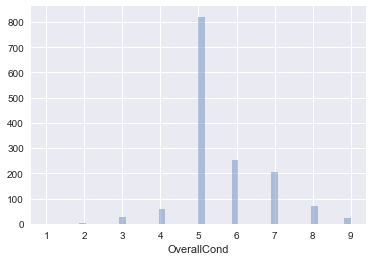

In [3]:
#histogram
plt.figure(); sns.distplot(df['OverallQual'],kde=False)
plt.figure(); sns.distplot(df['SalePrice'],kde=False)
plt.figure(); sns.distplot(df['OverallCond'],kde=False)

** b. Normality Check **

In [4]:
# - check with skewness and kurtosi
print("\n- Skewness of SalePrice histogram: %f" % df['SalePrice'].skew())
print("\n- Kurtosis of SalePrice histogram: %f" % df['SalePrice'].kurt())


- Skewness of SalePrice histogram: 1.882876

- Kurtosis of SalePrice histogram: 6.536282


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.164745194154, 180921.19589041095, 0.93196656415129864))

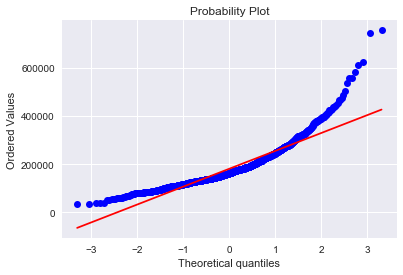

In [5]:
# - check with Q-Q Plot
plt.figure(); stats.probplot(df['SalePrice'], plot=plt)

you can simply normalized by taking a logarithm. check out Q-Q plot for normality

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 10.46024211,  10.47194981,  10.54270639, ...,  13.34550693,
          13.5211395 ,  13.53447303])),
 (0.39826223081618878, 12.024050901109383, 0.99537614756366133))

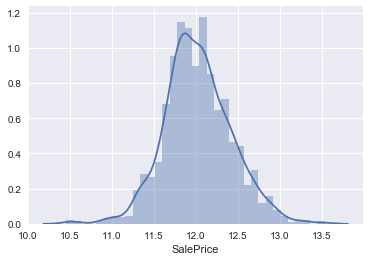

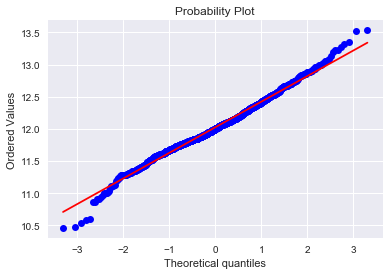

In [6]:
# - normalize
plt.figure(); sns.distplot(np.log(df['SalePrice']),kde=True)
plt.figure(); stats.probplot(np.log(df['SalePrice']), plot=plt)

as the 'OverallQual(categorical value)' seems to be the easiest guess for the predictor for 'SalePrice', we can check the relation between them by boxplot. you can see the price gets higer with better overall quality.

** c. Correlations **

/Users/Josh/anaconda/envs/venv_py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


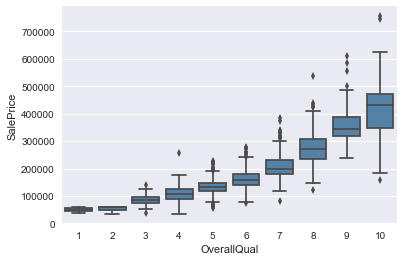

In [7]:
plt.figure()
sns.boxplot(df['OverallQual'], df['SalePrice'], color = 'steelblue')
plt.legend(); plt.xlabel('OverallQual'); plt.ylabel('SalePrice')

we can check the relations between some features to price as belows. 

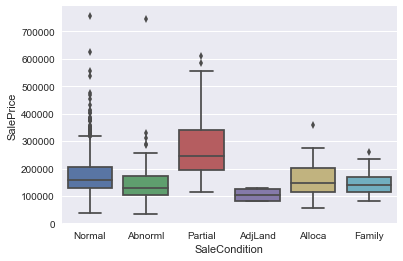

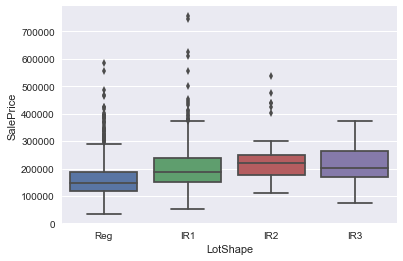

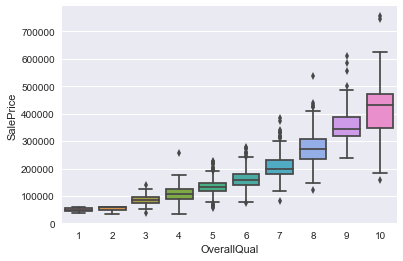

In [8]:
plt.figure(); sns.boxplot(df['SaleCondition'], df['SalePrice'])
plt.figure(); sns.boxplot(df['LotShape'], df['SalePrice'])
plt.figure(); sns.boxplot(df['OverallQual'], df['SalePrice'])

** d. Missing Values **

In [9]:
print("\n - Missinv Value portion: \n", (df.isnull().sum()/len(df)).sort_values(ascending=False))


 - Missinv Value portion: 
 PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
LotFrontage      0.177397
GarageCond       0.055479
GarageType       0.055479
GarageYrBlt      0.055479
GarageFinish     0.055479
GarageQual       0.055479
BsmtExposure     0.026027
BsmtFinType2     0.026027
BsmtFinType1     0.025342
BsmtCond         0.025342
BsmtQual         0.025342
MasVnrArea       0.005479
MasVnrType       0.005479
Electrical       0.000685
Utilities        0.000000
YearRemodAdd     0.000000
MSSubClass       0.000000
Foundation       0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior2nd      0.000000
Exterior1st      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
YearBuilt        0.000000
                   ...   
GarageArea       0.000000
PavedDrive       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
3SsnPorch        0.000000
BsmtUnfSF        0.000000
ScreenPor

Dealing with missing values: take out features with too many missing values, and fill mean values for rest of NaNs.

In [10]:
# Take out columns with too many NaNs
col_nan=(df.isnull().sum()/len(df)).sort_values(ascending=False)[:7].index
df = df.drop(col_nan, axis=1)

# replace with mean of each column for the rest of the features
df = df.fillna(df.mean())


## 2.  Feature Selection